# Checking working of Blockchain 
## By- Aarush Kumar
### Dated: Feb 08,2021

In [1]:
from hashlib import sha256 # a 256-bit hash function 
def simple_hash_func(in_value):
    return sha256('{}'.format(in_value).encode()).hexdigest()[-7:]

In [2]:
%%time
my_favorite_number = 12345
print(my_favorite_number,'\t',simple_hash_func(my_favorite_number))
# we can now try adding one to this number and we see that the hash changes
print(my_favorite_number+1,'\t',simple_hash_func(my_favorite_number+1))
if simple_hash_func(my_favorite_number) != simple_hash_func(my_favorite_number+1):
    print('Hashes do not match!')

12345 	 3cacfc5
12346 	 09ce524
Hashes do not match!
CPU times: user 227 µs, sys: 31 µs, total: 258 µs
Wall time: 263 µs


In [3]:
transactions = [
    ['2017-12-12', 'Tim pays Joel $3'],
    ['2017-12-13', 'Joel pays Kevin $1.5'],
    ['2017-12-13', 'Tim pays Joel $3']
]
last_signature = ''
signed_transactions = []
for date, content in transactions:
    last_signature = simple_hash_func(date+content+last_signature)
    signed_transactions += [[date, content, last_signature]]
                       
for date, content, signature in signed_transactions:
    print('\t'.join([date, content, signature]))

2017-12-12	Tim pays Joel $3	bb3d468
2017-12-13	Joel pays Kevin $1.5	3b9fa20
2017-12-13	Tim pays Joel $3	b740a16


In [4]:
transactions[1][1] = 'Joel pays Kevin $15.'
last_signature = ''
new_signed_transactions = []
for date, content in transactions:
    last_signature = simple_hash_func(date+content+last_signature)
    new_signed_transactions += [[date, content, last_signature]]
                       
for (date, content, new_signature), (_, _, old_signature) in zip(new_signed_transactions, signed_transactions):
    print('\t'.join([date, content]))
    print('\t\t\tnew: ', new_signature)
    print('\t\t\told: ', old_signature)

2017-12-12	Tim pays Joel $3
			new:  bb3d468
			old:  bb3d468
2017-12-13	Joel pays Kevin $15.
			new:  52c4683
			old:  3b9fa20
2017-12-13	Tim pays Joel $3
			new:  eaac70e
			old:  b740a16


In [5]:
%%time
from itertools import product
from string import ascii_letters

goal_hash = signed_transactions[1][2]
last_signature = simple_hash_func(signed_transactions[0][0]+signed_transactions[0][1]+'')

for c_vals in product(*[' '+ascii_letters]*6):
    start_text = 'Joel pays Kevin $15. {}'.format(''.join(c_vals))
    cur_hash = simple_hash_func(signed_transactions[1][0]+start_text+last_signature) 
    if cur_hash == goal_hash:
        print('magic text found:', start_text)
        break

magic text found: Joel pays Kevin $15. a zRsQ
CPU times: user 15min 39s, sys: 1.02 s, total: 15min 40s
Wall time: 16min 1s


In [6]:
transactions[1][1] = start_text
last_signature = ''
new_signed_transactions = []
for date, content in transactions:
    last_signature = simple_hash_func(date+content+last_signature)
    new_signed_transactions += [[date, content, last_signature]]
                       
for (date, content, new_signature), (_, _, old_signature) in zip(new_signed_transactions, signed_transactions):
    print('\t'.join([date, content]))
    print('\t\t\tnew: ', new_signature)
    print('\t\t\told: ', old_signature)

2017-12-12	Tim pays Joel $3
			new:  bb3d468
			old:  bb3d468
2017-12-13	Joel pays Kevin $15. a zRsQ
			new:  3b9fa20
			old:  3b9fa20
2017-12-13	Tim pays Joel $3
			new:  b740a16
			old:  b740a16


In [7]:
%%time
my_favorite_number = 12345
proof_of_work = 0  # We don't know what it is yet...
while simple_hash_func(my_favorite_number*proof_of_work)[-1] != "0":
    proof_of_work += 1
print('The solution is proof of work = {}'.format(proof_of_work))
print('Verification',simple_hash_func(my_favorite_number*proof_of_work))

The solution is proof of work = 7
Verification da8e660
CPU times: user 1.68 ms, sys: 0 ns, total: 1.68 ms
Wall time: 1.6 ms


In [8]:
def calculate_proof_of_work(in_number, out_zeros):
    proof_of_work = 0  # We don't know what it is yet...
    goal_zero_str = ''.join(["0"]*out_zeros)
    while simple_hash_func(my_favorite_number*proof_of_work)[-out_zeros:] != goal_zero_str:
        proof_of_work += 1
    return proof_of_work

In [9]:
%%time
proof_of_work = calculate_proof_of_work(my_favorite_number, 5)
print('The solution is proof of work = {}'.format(proof_of_work))
print('Verification',simple_hash_func(my_favorite_number*proof_of_work))

The solution is proof of work = 1969873
Verification 9200000
CPU times: user 3.5 s, sys: 0 ns, total: 3.5 s
Wall time: 3.52 s


In [10]:
%%time
from time import clock
zero_out, time_out = [], []
for i in range(1, 6+1):
    start = clock()
    # average over 3 different numbers
    for j in range(3):
        _ = calculate_proof_of_work(my_favorite_number+j, i)
    t_out = (clock()-start)/3*1000
    time_out += [t_out]
    zero_out += [i]
    print(i,'\t', '%4e ms' % t_out)

1 	 7.733333e-02 ms
2 	 7.386667e-01 ms
3 	 6.865000e+00 ms
4 	 6.188667e+00 ms


/home/aarush100616/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
/home/aarush100616/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


5 	 3.468871e+03 ms
6 	 2.906883e+04 ms
CPU times: user 1min 37s, sys: 20 ms, total: 1min 37s
Wall time: 1min 38s


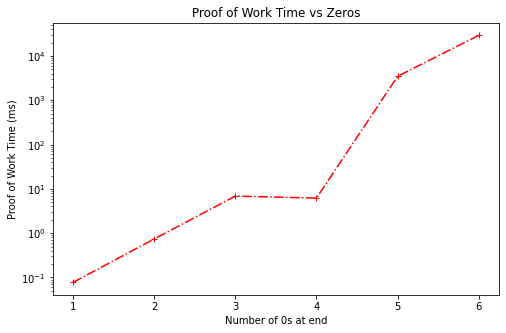

In [11]:
%matplotlib inline
try:
    import matplotlib.pyplot as plt
    fig, out_ax = plt.subplots(1,1, figsize = (8, 5))
    out_ax.semilogy(zero_out, time_out, 'r+-.')
    out_ax.set_title('Proof of Work Time vs Zeros')
    out_ax.set_ylabel('Proof of Work Time (ms)')
    out_ax.set_xlabel('Number of 0s at end')
except ImportError as ie:
    print('Matplotlib is required to show plots')